# Data Visualization for the Car details dataset

## Importing the standard libraries and the dataset

In [63]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dataset = pd.read_csv('./assets/car-details-for-visualization.csv')

print(dataset.columns)

dataset_with_brands = dataset

dataset = dataset.iloc[:, 0:15]

dep_variable = dataset.pop('selling_price')

dataset.insert(len(dataset.columns), 'selling_price', dep_variable)

dataset.head()

Index(['brand', 'year', 'km_driven', 'fuel', 'transmission', 'seller_type',
       'owner', 'seats', 'mileage', 'engine', 'max_power', 'nm',
       'selling_price'],
      dtype='object')


,brand,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,nm,selling_price
0,Maruti,2014,145500,1,1,1,0,5.0,23.40,1248,74.00,190.00,450000
1,Skoda,2014,120000,1,1,1,2,5.0,21.14,1498,103.52,250.00,370000
2,Honda,2006,140000,3,1,1,4,5.0,17.70,1497,78.00,124.54,158000
3,Hyundai,2010,127000,1,1,1,0,5.0,23.00,1396,90.00,219.67,225000
4,Maruti,2007,120000,3,1,1,0,5.0,16.10,1298,88.20,112.78,130000


Confirming the dataset is available and correct:

In [65]:
dataset.head()

,brand,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,nm,selling_price
0,Maruti,2014,145500,1,1,1,0,5.0,23.40,1248,74.00,190.00,450000
1,Skoda,2014,120000,1,1,1,2,5.0,21.14,1498,103.52,250.00,370000
2,Honda,2006,140000,3,1,1,4,5.0,17.70,1497,78.00,124.54,158000
3,Hyundai,2010,127000,1,1,1,0,5.0,23.00,1396,90.00,219.67,225000
4,Maruti,2007,120000,3,1,1,0,5.0,16.10,1298,88.20,112.78,130000


### Visualizing the selling price in correlation with other features

In [66]:
price_mean = dataset['selling_price'].mean()
price_median = dataset['selling_price'].median()

print('Mean:', price_mean)
print('Median:', price_median)

Mean: 649813.720844928
Median: 450000.0


<AxesSubplot:>

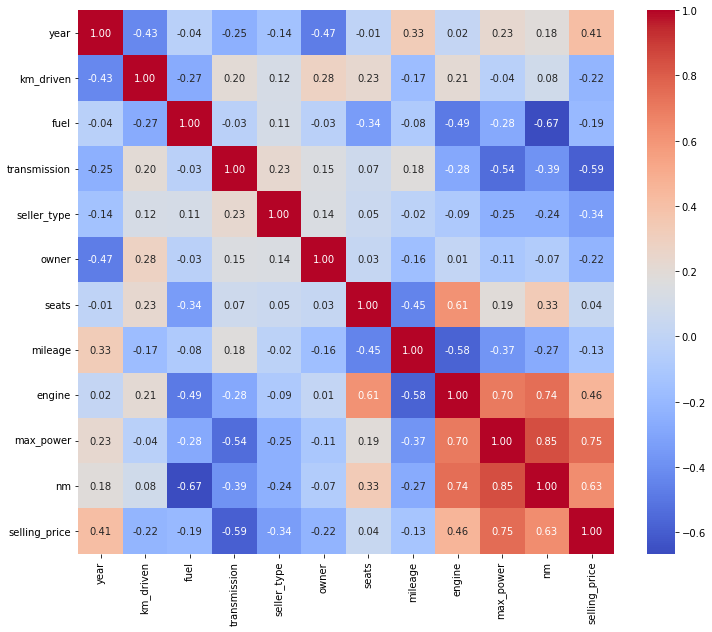

In [67]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cbar=True, cmap='coolwarm')

Seeing this plot helps visualize the relationship between the selling price and other features.

Not having done this, I would have believed a feature like km_driven and transmission would be a lot more correlated with the selling price.

The features that seem important for the selling price is year, engine, max_power and nm.